In [1]:
# If needed (run in Anaconda Prompt / terminal, not inside notebook):
# pip install scikit-learn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("preprocessed_data.csv")
df.head()


,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,False,0.000000,0.0,0.420000,0.49500,0.330,0.36000,0.500000,1.000000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,0.500000,0.0,0.660000,0.30500,0.300,0.50000,1.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,0.015625,0.0,0.450000,0.42750,0.250,0.20000,0.148468,0.098389,...,0,0,0,1,0,0,0,0,0,1
4,Blue,False,0.125000,0.0,0.535625,0.57875,0.185,0.16625,0.125000,0.187500,...,0,1,0,0,0,0,1,0,0,0


In [3]:
df.columns = df.columns.str.strip()

# show numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
len(numeric_cols), numeric_cols[:25]


(158,
 ['B_avg_KD',
  'B_avg_opp_KD',
  'B_avg_SIG_STR_pct',
  'B_avg_opp_SIG_STR_pct',
  'B_avg_TD_pct',
  'B_avg_opp_TD_pct',
  'B_avg_SUB_ATT',
  'B_avg_opp_SUB_ATT',
  'B_avg_REV',
  'B_avg_opp_REV',
  'B_avg_SIG_STR_att',
  'B_avg_SIG_STR_landed',
  'B_avg_opp_SIG_STR_att',
  'B_avg_opp_SIG_STR_landed',
  'B_avg_TOTAL_STR_att',
  'B_avg_TOTAL_STR_landed',
  'B_avg_opp_TOTAL_STR_att',
  'B_avg_opp_TOTAL_STR_landed',
  'B_avg_TD_att',
  'B_avg_TD_landed',
  'B_avg_opp_TD_att',
  'B_avg_opp_TD_landed',
  'B_avg_HEAD_att',
  'B_avg_HEAD_landed',
  'B_avg_opp_HEAD_att'])

In [4]:
[c for c in df.columns if "avg" in c.lower()][:40]


['B_avg_KD',
 'B_avg_opp_KD',
 'B_avg_SIG_STR_pct',
 'B_avg_opp_SIG_STR_pct',
 'B_avg_TD_pct',
 'B_avg_opp_TD_pct',
 'B_avg_SUB_ATT',
 'B_avg_opp_SUB_ATT',
 'B_avg_REV',
 'B_avg_opp_REV',
 'B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_opp_SIG_STR_att',
 'B_avg_opp_SIG_STR_landed',
 'B_avg_TOTAL_STR_att',
 'B_avg_TOTAL_STR_landed',
 'B_avg_opp_TOTAL_STR_att',
 'B_avg_opp_TOTAL_STR_landed',
 'B_avg_TD_att',
 'B_avg_TD_landed',
 'B_avg_opp_TD_att',
 'B_avg_opp_TD_landed',
 'B_avg_HEAD_att',
 'B_avg_HEAD_landed',
 'B_avg_opp_HEAD_att',
 'B_avg_opp_HEAD_landed',
 'B_avg_BODY_att',
 'B_avg_BODY_landed',
 'B_avg_opp_BODY_att',
 'B_avg_opp_BODY_landed',
 'B_avg_LEG_att',
 'B_avg_LEG_landed',
 'B_avg_opp_LEG_att',
 'B_avg_opp_LEG_landed',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'B_avg_opp_DISTANCE_att',
 'B_avg_opp_DISTANCE_landed',
 'B_avg_CLINCH_att',
 'B_avg_CLINCH_landed']

In [5]:
X_col = "B_avg_TD_pct"        # predictor (independent variable)
y_col = "B_avg_SIG_STR_pct"   # outcome (dependent variable)


In [6]:
model_df = df[[X_col, y_col]].dropna()

X = model_df[[X_col]].values   # 2D array
y = model_df[y_col].values     # 1D array

print("Rows used:", len(model_df))


Rows used: 5902


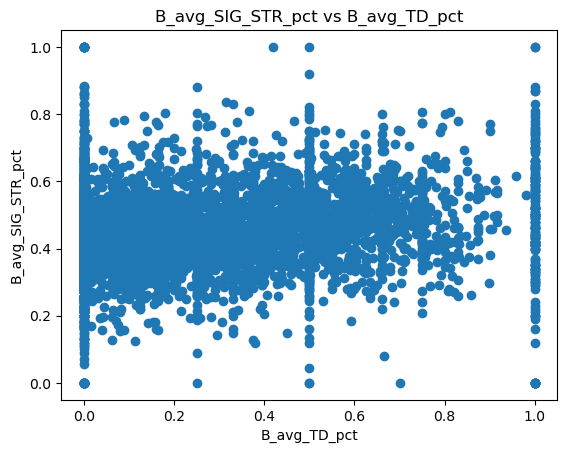

In [7]:
plt.figure()
plt.scatter(X, y)
plt.xlabel(X_col)
plt.ylabel(y_col)
plt.title(f"{y_col} vs {X_col}")
plt.show()


Hypothesis: B_avg_TD_pct has a weak or no linear relationship with B_avg_SIG_STR_pct. In other words, changes in takedown success rate do not strongly predict a fighter’s significant strike accuracy.

Hypothesis: As B_avg_TD_pct increases, B_avg_SIG_STR_pct will show little to no change, indicating takedown success and striking accuracy are largely independent in this dataset.

The vertical bands at 0 and 1 suggest many observations share identical TD% values (likely due to rounding or few attempts), which may reduce the usefulness of TD% alone as a predictor of strike accuracy.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Intercept:", reg.intercept_)
print("Slope:", reg.coef_[0])


Intercept: 0.43286906601019126
Slope: 0.0737456241398198


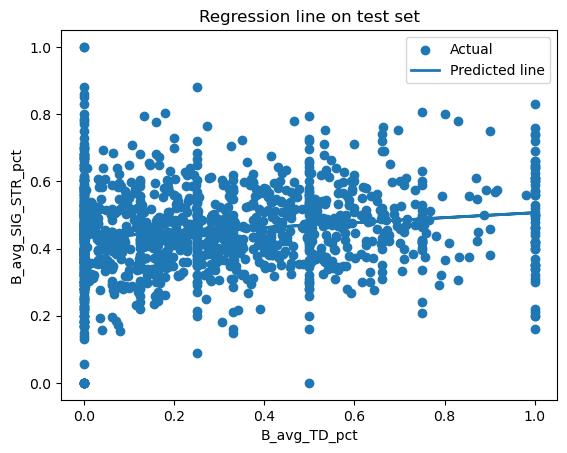

In [10]:
plt.figure()
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, linewidth=2, label="Predicted line")
plt.xlabel(X_col)
plt.ylabel(y_col)
plt.title("Regression line on test set")
plt.legend()
plt.show()


In [11]:
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)


MSE: 0.012362193328774517
R2: 0.02425887490748213


In [12]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results["Error"] = results["Actual"] - results["Predicted"]
results.head(15)


,Actual,Predicted,Error
0,0.546250,0.464303,0.081947
1,0.157500,0.435819,-0.278319
2,0.689863,0.481892,0.207971
3,0.350000,0.462367,-0.112367
4,0.355000,0.469742,-0.114742
5,0.299375,0.478315,-0.178940
6,0.464375,0.443724,0.020651
7,0.539381,0.465101,0.074280
8,0.292500,0.490944,-0.198444
9,0.470000,0.485597,-0.015597


The slope of the regression is slightly positive, meaning that as B_avg_TD_pct increases, B_avg_SIG_STR_pct shows a very small tendency to increase. However, this effect is minimal.

The R² = 0.024 indicates that the model explains approximately 2.4% of the variation in B_avg_SIG_STR_pct using B_avg_TD_pct alone. This suggests that takedown success percentage is a poor predictor of striking accuracy in this dataset.

The MSE = 0.012 suggests that prediction error is moderate relative to the 0–1 range of the outcome variable. While the absolute error appears small, the low R² indicates that the model does not meaningfully capture the underlying variability in the data.

Based on the scatterplot and the regression line, the relationship appears weak and not strongly linear, with substantial dispersion and clustering of points across the range of takedown success values.

Bias Reflection (UFC Context)

This dataset may reflect bias due to differences in opponent quality, weight class, era and rule changes, uneven fight counts, and missing or rounded statistics (e.g., takedown attempts). Additionally, selection effects exist because only fights with recorded metrics are included. These factors limit the reliability of a single-predictor regression model and suggest that striking accuracy is influenced by many variables beyond takedown success alone.

### Conclusion

This analysis shows that B_avg_TD_pct alone does not strongly predict B_avg_SIG_STR_pct. 
The weak relationship and low R² value indicate that striking accuracy is influenced by 
multiple factors beyond takedown success. A more accurate model would require additional 
predictors such as opponent quality, fight style, or total fight volume.
